<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_%EC%9D%91%EC%9A%A9(%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#웹 크롤링
from bs4 import BeautifulSoup
url = 'https://www.naver.com' #사이트 주소
response = urllib.request.urlopen(url) #웹 서버에 요청
res = response.read().decode('utf-8')
bre = BeautifulSoup(res,'html.parser')
print(bre.body.text) #텍스트만 얻어오기

wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wc.generate(bre.body.text)
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.words_

#train_titanic.csv 파일의 내용을 분석 실습

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import json
import matplotlib.pyplot as plt
from  wordcloud import WordCloud
import matplotlib.font_manager as font_manager

In [2]:
path = '/content/drive/MyDrive/module/train_titanic.csv'
df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



#1. 주어진 자료의 인원, 생존자, 사망자는 몇 명인가?

In [35]:
#인원
count = df['PassengerId'].count()
#생존자와 사망자
sur_data = df['Survived']
print(type(sur_data))
svc = sur_data.value_counts()
#0은 사망자 1은 생존자
print(type(svc)) #series는 인덱스와 value가 있다.
sur_data.count()
print(f"인원 : {sur_data.count()}, 사망자수 : {svc.values[0]}, 생존자 수 : {svc.values[1]}")

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
인원 : 891, 사망자수 : 549, 생존자 수 : 342


#2. 생존자와 사망자를 Pie 그래프로 나타내고 생존자와 사망자의 퍼센트를 소수점 2자리까지 나타내시오.

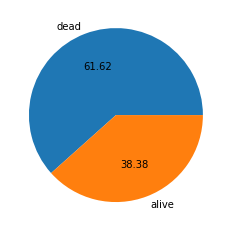

In [ ]:
labels=["dead", "alive"]
plt.pie(svc, labels= labels, autopct='%.2f')
plt.show()

#3. 결측데이터가 있는 컬럼들을 조사하시오.

In [31]:
df.info() #전체 summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
df['Age'].isnull().value_counts() #null이 177개

False    714
True     177
Name: Age, dtype: int64

In [33]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [34]:
df['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

#4. Pclass의 종류별로 분포를 Pie 그래프로 나타내시오.

In [24]:
df.Pclass #df['Pclass']와 같은 말 #하나의 시리즈가 된다
print(type(df.Pclass))
dvc = df.Pclass.value_counts()  #값의 종류와 각 값의 갯수까지 파악
dvc

<class 'pandas.core.series.Series'>


3    491
1    216
2    184
Name: Pclass, dtype: int64

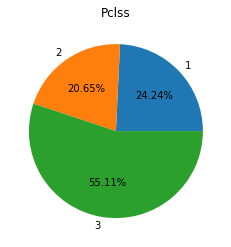

In [25]:
dvc = df.Pclass.value_counts().sort_index() #인덱스 순으로 정렬
plt.pie(dvc.values, labels=['1','2','3'], autopct="%.2f%%")
plt.title("Pclss")
plt.show()


#5. Pclass의 종류별로 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

In [26]:
pdata = df.Pclass
pdata.unique() #값의 종류가 무엇인지만 확인
cn = len(pdata.unique()) #컬렉션의 길이
pc_alive_arr = np.zeros(cn)
pc_dead_arr = np.zeros(cn)
pc_alive_arr, pc_dead_arr #각 클래스 별로 생존자, 사망자를 넣기 위해 초기값 지정하여 분리

for index in range(len(pdata)):
  pi = pdata[index]-1 #Pclass는 1,2,3인데 이를 0,1,2로 변환하여 인덱스로 사용하기 위해서 1 감소
  if sur_data[index]==0: #사망한 승객일 때
    pc_dead_arr[pi]+=1
  else:
    pc_alive_arr[pi]+=1 #생존한 승객일 때
pc_alive_arr, pc_dead_arr #각 클래스의 생존자 사망자 확인

labels=['1','2','3']
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(cn):
  plt.annotate(str(pc_alive_arr[i]),(-0.1+i, 40))
  plt.annotate(str(pc_dead_arr[i]),(-0.1+i, pc_alive_arr[i]+30))
plt.xlabel('Pclass')
plt.show()

NameError: ignored

#6. Name 컬럼에 탑승자를 부르는 호칭을 Mr, Mrs, Miss, Master, Dr, ETC로 나누어 분포를 파이 그래프로 나타내시오.

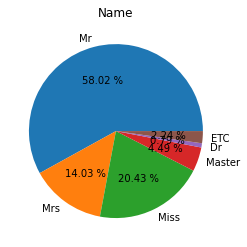

In [23]:
df.Name
names_values=['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'ETC']
#names_values 중에 몇 번째 것인지 판별하는 함수
def get_name_index(name):
  first, second= name.split(',')#,를 기준으로 앞뒤로 분리시켜서 뒤쪽 데이터만 사용
  foos = second.split('.' )#뒤의 데이터 중에서도 .을 기준으로 분리, 그런데 .이 있지 않은 것도 있어서 컬렉션을 받고
  tn = foos[0].replace(' ','') #공백을 없앤다.
  for index, nv in enumerate(names_values):
    if nv == tn:  #names_values에 있는 각 요소들이 name에서 가져온 tn과 일치할 때
      return index  
  return 5

#ni=get_name_index(df.Name[1])  잘 작동하는지 확인
#print(f"{df.Name[1]} : {names_values[ni]}")

n_cnts = np.zeros(6) #names_values 길이만큼을 원소값0 array로 만들기
for i, name in enumerate(df.Name):
  ni = get_name_index(name)
  n_cnts[ni] +=1
#print(n_cnts)

plt.pie(n_cnts, labels=names_values, autopct="%.2f %%")
plt.title("Name")
plt.show()

#7. 앞에서 구분한 호칭에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

In [22]:
pn_alive_arr = np.zeros(6)
pn_dead_arr = np.zeros(6)
for i,name in enumerate(df.Name):
  ni = get_name_index(name)
  if sur_data[i]==0:
    pn_dead_arr[ni]+=1
  else:
    pn_alive_arr[ni]+=1
plt.bar(names_values, pn_alive_arr)
plt.bar(names_values, pn_dead_arr, bottom = pn_alive_arr)
for i in range(6):
  plt.annotate(str(pn_alive_arr[i]),(-0.1+i,40))
  if pn_alive_arr[i]<40:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i, pn_alive_arr[i]+80))
  else:
    plt.annotate(str(pn_dead_arr[i]),(-0.1+i, pn_alive_arr[i]+80))
plt.show()

NameError: ignored

#8. 성별로 분포를 파이 그래프로 나타내시오.

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

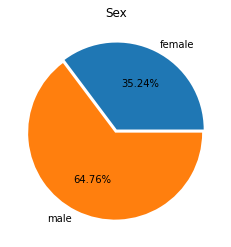

In [ ]:
svc = df.Sex.value_counts().sort_index()
plt.pie(svc.values, labels = ['female', 'male'], autopct="%.2f%%", explode=[0.02, 0.02])
plt.title("Sex")
plt.show()

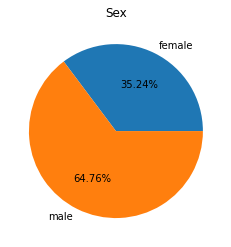

In [ ]:
sex_values = ['female', 'male']
def get_sex_index(sex):
  if sex == 'female':
    return 0
  return 1

s_cnts = np.zeros(2)
for i, sex in enumerate(df.Sex):
  si = get_sex_index(sex)
  s_cnts[si] += 1

plt.pie(s_cnts, labels=sex_values, autopct="%.2f%%")
plt.title("Sex")
plt.show()

#9. 성별에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

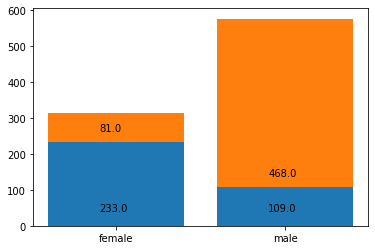

In [ ]:
sdata = df.Sex
sn=len(sdata.unique())
ps_alive_arr = np.zeros(sn)
ps_dead_arr = np.zeros(sn)
for index in range(len(sdata)):
  if sdata[index] == 'female':
    si = 0
  else:
    si = 1
  if sur_data[index]==0:
    ps_dead_arr[si]+=1
  else:
    ps_alive_arr[si]+=1
  
labels=['female', 'male']
plt.bar(labels, ps_alive_arr)
plt.bar(labels, ps_dead_arr, bottom=ps_alive_arr)
for i in range(sn):
  plt.annotate(str(ps_alive_arr[i]), (-0.1+i, 40))
  plt.annotate(str(ps_dead_arr[i]), (-0.1+i, ps_alive_arr[i]+30))
plt.show()



#10. 나이를 5살 범위로 17단계로(0-5, 5-10,...,80-85)로 나누어 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 평균나이로 처리하시오.)


In [43]:
#결측데이터 채우기
#df.Age.isnull().value_counts()
mv = df.Age.mean() #평균
ad = df.Age.fillna(mv) #결측치를 수정
ad.isnull().value_counts() #확인

False    891
Name: Age, dtype: int64

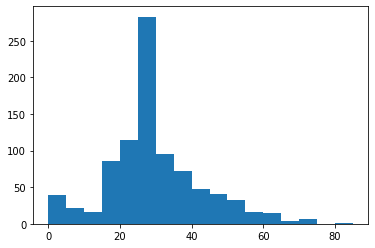

In [44]:
#histogram 도수 분포표를 막대 그래프로 시각화
n, bins, patches = plt.hist(ad, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
plt.show()

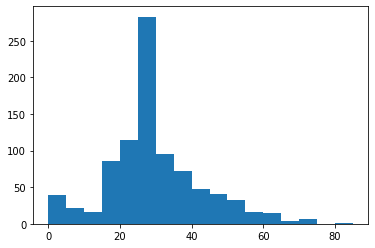

In [50]:
#위에서 n을 가져온다
n, _, _ = plt.hist(ad, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
plt.show()

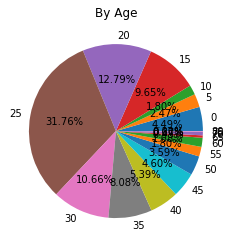

In [67]:
numbers=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80']
plt.pie(n, labels=numbers, autopct="%.2f%%")
plt.title('By Age')
plt.show()

In [46]:
#hist 몰랐을 때 하는 법
age_values=np.zeros(17)
for i, age in enumerate(ad):
  ai = age//5 #age_values에 사용할 인덱스
  ai = int(ai) #ai가 float이기 때문에 int로 형변환
  age_values[ai]+=1
age_values

array([ 40.,  22.,  16.,  86., 114., 283.,  95.,  72.,  48.,  41.,  32.,
        16.,  15.,   4.,   6.,   0.,   1.])

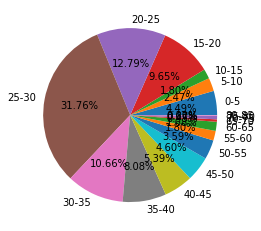

In [47]:
plt.pie(age_values, labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85'], autopct="%.2f%%")
plt.show()

#11. 나이를 구분한 단계에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

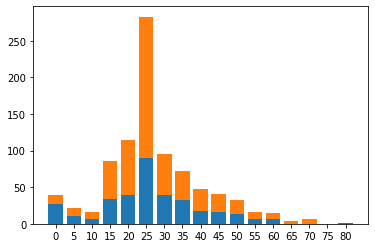

   0  ~  5:40.0
   5  ~  10:22.0
  10  ~  15:16.0
  15  ~  20:86.0
  20  ~  25:114.0
  25  ~  30:283.0
  30  ~  35:95.0
  35  ~  40:72.0
  40  ~  45:48.0
  45  ~  50:41.0
  50  ~  55:32.0
  55  ~  60:16.0
  60  ~  65:15.0
  65  ~  70:4.0
  70  ~  75:6.0
  75  ~  80:0.0
  80  ~  85:1.0


In [ ]:
ps_alive_arr = np.zeros(17)
ps_dead_arr = np.zeros(17)
for index in range(len(ad)):
  ai = ad[index]//5 
  ai = int(ai) 

  if sur_data[index]==0:
    ps_dead_arr[ai]+=1
  else:
    ps_alive_arr[ai]+=1
  
labels=['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75','80']
plt.bar(labels, ps_alive_arr)
plt.bar(labels, ps_dead_arr, bottom=ps_alive_arr)
plt.show()
for i in range(17):
  print(f"{i*5:4d}  ~  {(i+1)*5}:{age_values[i]}")


#12. SibSp 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

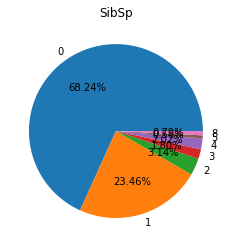

In [ ]:
df.SibSp.value_counts()
df.SibSp.isnull().value_counts()
svc = df.SibSp.value_counts().sort_index()
plt.pie(svc.values, labels = svc.index , autopct="%.2f%%")
plt.title("SibSp")
plt.show()

#13. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

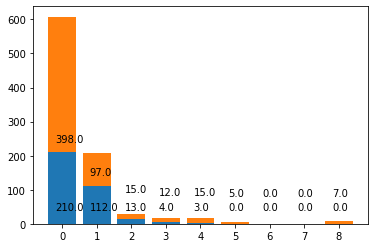

In [ ]:
sdata = df.SibSp
sn = 9 #형제자매 수를 인덱스로 사용하기 위해서 0-8까지 9개를 사용
sc_alive_arr = np.zeros(sn)
sc_dead_arr = np.zeros(sn)
for index in range(len(sdata)):
  si = sdata[index] #형제자매수를얻어온다
  if sur_data[index]==0:
    sc_dead_arr[si]+=1
  else:
    sc_alive_arr[si]+=1
  
labels=[str(i) for i in range(9)]
plt.bar(labels,sc_alive_arr)
plt.bar(labels,sc_dead_arr,bottom=sc_alive_arr)
for i in range(sn):
  plt.annotate(str(sc_alive_arr[i]),(-0.2+i, 40))
  if sc_alive_arr[i]<40:
    plt.annotate(str(sc_dead_arr[i]),(-0.2+i, sc_alive_arr[i]+80))
  else:
    plt.annotate(str(sc_dead_arr[i]),(-0.2+i, sc_alive_arr[i]+30))
plt.show()

In [5]:
a_data = df['Age'] #같은 표현 a_data = df.Age
a_data
print(type(a_data))
#데이터 프레임 = 여러개의 시리즈
#데이터 프레임에서 특정한 컬럼을 추출하면 하나의 시리즈
a_data.value_counts() #분포수 세기
a_data.unique() #값의 종류가 무엇인지만 확인하고 싶을 때
a_data.fillna(mv) # 결측값 채우기
a_data.isnull().value_counts() #결측 데이터 있는지 확인하기
a_data = a_data.fillna(mv) #결측값 채우고 a_data 에 다시 넣어주기
a_data.isnull().value_counts() #그 다음에 결측 데이터 있는지 확인하면 사라져있다.
n_data = df.Name
n_data

<class 'pandas.core.series.Series'>


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
n_data = df.Name
n_data
def get_call_name(name):
  _,s = name.split(',') #필요없는 데이터는 _ 로 표시
  #sf, ss = s.split('.') #second의 first 그리고 second의 second
  foos = s.split('.') #컬렉션에 넣기 Mr 다음에 . 있는 것 분리
  return foos[0].replace(' ','')
#get_call_name(n_data[0])
for name in n_data:
#  print(get_call_name(name))
  if get_call_name(name) == "Mr":
    print(".")


In [11]:
df.info() #전체 summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#14. Parch 컬럼의 값의 종류에 따른 분포를 조사하여 파이 그래프로 나타내시오.

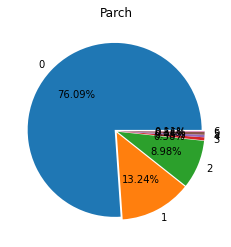

In [40]:
pvc = df.Parch.value_counts().sort_index() #pvc가 시리즈
plt.pie(pvc.values, labels = pvc.index , autopct="%.2f%%", explode=[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])
plt.title("Parch")
plt.show()

#15. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

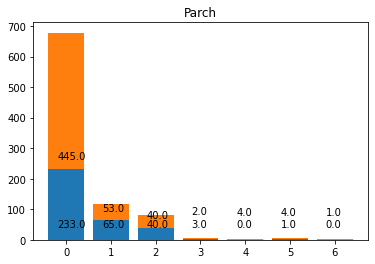

In [41]:
pdata = df.Parch
pn = 7 #직계 가족수를 인덱스로 사용하기 위해서 0~6까지 7개를 사용
pc_alive_arr = np.zeros(pn)
pc_dead_arr = np.zeros(pn)
for index in range(len(pdata)):
  pi = pdata[index] #직계 가족 수
  if sur_data[index]==0: #사망 승객
    pc_dead_arr[pi]+=1
  else: #생존 승객
    pc_alive_arr[pi]+=1
  
labels=[str(i) for i in range(pn)] #0~7까지 문자열로
plt.bar(labels,pc_alive_arr)
plt.bar(labels,pc_dead_arr,bottom=pc_alive_arr)
for i in range(pn):
  plt.annotate(str(pc_alive_arr[i]),(-0.2+i, 40))
  if pc_alive_arr[i]<40:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i, pc_alive_arr[i]+80))
  else:
    plt.annotate(str(pc_dead_arr[i]),(-0.2+i, pc_alive_arr[i]+30))
plt.title('Parch')
plt.show()

#16. 승선한 항구(Embarked 컬럼)에 따른 분포를 조사하여 파이 그래프로 나타내시오.(결측값은 'N'으로 마킹하시오.)

In [69]:
#결측데이터 확인
df.Embarked.isnull().value_counts()
#결측데이터 없애기
edata = df.Embarked.fillna('N')
edata.isnull().value_counts()

False    891
Name: Embarked, dtype: int64

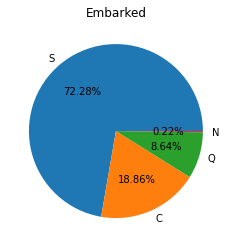

In [70]:
evc =edata.value_counts()
#print(type(evc)) evc의 타입은 시리즈 scqn은 인덱스 644 168 77 2 는 value
plt.pie(evc.values, labels = evc.index , autopct="%.2f%%")
plt.title("Embarked")
plt.show()

#17. 값에 따른 생존자와 사망자를 하나의 막대그래프로 나타내시오.(아래:생존자, 위:사망자)

In [73]:
evc.index # s는 eve[0]
#각 요소의 인덱스를 지정
def get_embarked_index(embarked):
  if embarked == "S":
    return 0
  if embarked == "C":
    return 1
  if embarked == "Q":
    return 2
  if embarked == "N":
    return 3  
#잘 돌아가는지 확인
#i=0
#print(edata[i], get_embarked_index(edata[i]))

S 0


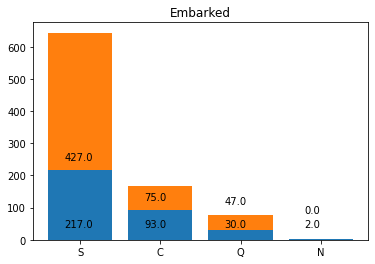

In [75]:
edata.unique() #값의 종류 확인
en = len(edata.unique()) #승선한 항구 수
ec_alive_arr = np.zeros(en)
ec_dead_arr = np.zeros(en)
for index in range(len(edata)):
  ei = get_embarked_index(edata[index]) #embarked의 인덱스 얻어온다
  if sur_data[index]==0: #사망 승객
    ec_dead_arr[ei]+=1
  else: #생존 승객
    ec_alive_arr[ei]+=1
  
labels=evc.index
plt.bar(labels,ec_alive_arr)
plt.bar(labels,ec_dead_arr,bottom=ec_alive_arr)
for i in range(en):
  plt.annotate(str(ec_alive_arr[i]),(-0.2+i, 40))
  if ec_alive_arr[i]<40:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i, ec_alive_arr[i]+80))
  else:
    plt.annotate(str(ec_dead_arr[i]),(-0.2+i, ec_alive_arr[i]+30))
plt.title('Embarked')
plt.show()